# Fase 2: Visualización


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

3. ¿Cuál es la distribución de los clientes por provincia o estado?

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

### Importamos las librerías que necesitamos

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
from src import support as sp

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Cargamos los datos generados en la Fase 1
df_activity = pd.read_csv('../data/processed/df_activity.csv', index_col=0)
df_history = pd.read_csv('../data/processed/df_history.csv', index_col=0)
df_combined = pd.read_csv('../data/processed/df_combined.csv', index_col=0)

In [3]:
# Verificamos que los datos se han cargado correctamente
df_activity.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_history.head()

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.000000,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Alberta,Edmonton,T3G 6Y6,Male,College,63450.672947,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,British Columbia,Vancouver,V6E 3D9,Male,College,67038.529293,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Ontario,Toronto,P1W 1K4,Male,College,70975.920152,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.000000,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [5]:
df_combined.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,64778.033656,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,64476.508588,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [6]:
# Agrupamos por 'Year' y 'Month' y sumamos la cantidad de vuelos reservados
monthly_flights = df_activity.groupby(['year', 'month'])['flights_booked'].sum().reset_index()
monthly_flights

,year,month,flights_booked
0,2017,1,47408
1,2017,2,47254
2,2017,3,63662
3,2017,4,55239
4,2017,5,64609
5,2017,6,79704
6,2017,7,88441
7,2017,8,77852
8,2017,9,62611
9,2017,10,59761


In [7]:
# Configuramos los meses para que se muestren correctamente en la gráfica
monthly_flights['month'] = pd.Categorical(monthly_flights['month'], categories=list(range(1, 13)), ordered=True) # Pasamos los parámetros: columna, lista de categorias y ordered True para que mantenga el orden
monthly_flights.info() # Vemos que el tipo de dato en month ha cambiado a categorico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            24 non-null     int64   
 1   month           24 non-null     category
 2   flights_booked  24 non-null     int64   
dtypes: category(1), int64(2)
memory usage: 936.0 bytes


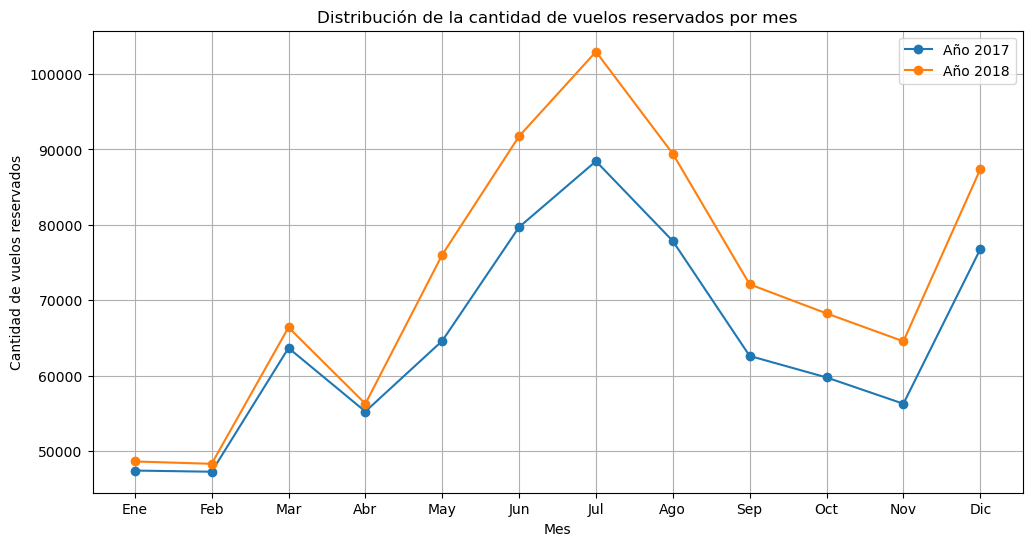

In [8]:
# Graficamos la cantidad de vuelos reservados por mes durante el año
plt.figure(figsize=(12, 6))
for year in monthly_flights['year'].unique():
    subset = monthly_flights[monthly_flights['year'] == year]
    plt.plot(subset['month'], subset['flights_booked'], marker='o', label=f'Año {year}')

plt.title('Distribución de la cantidad de vuelos reservados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.xticks(ticks=list(range(1, 13)), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.grid(True)
plt.show()

Vemos que hay un aumento significativo de las reservas de vuelos en los meses de mayo a septiembre, siendo julio y diciembre los meses con mayor cantidad de reservas. 

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [9]:
df_activity.head(2) # Recordemos los nombres de las variables

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


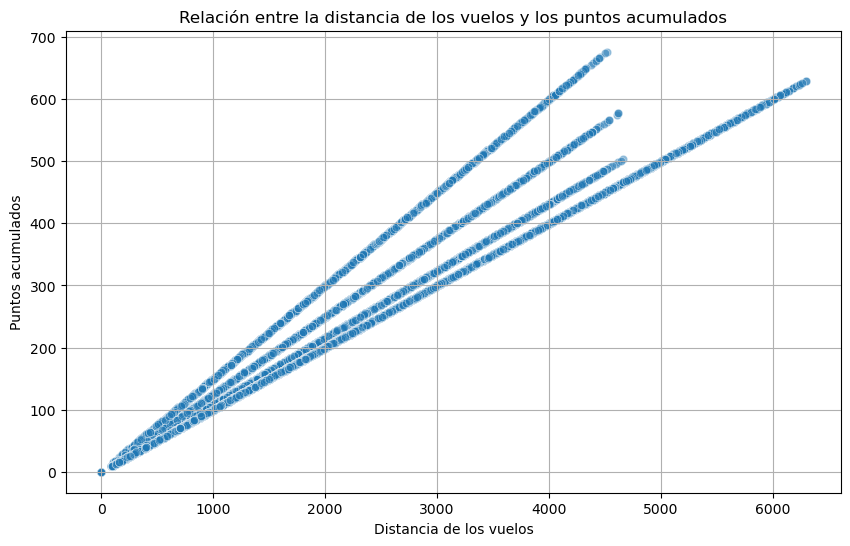

In [10]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 6))

# Creamos el scatterplot
sns.scatterplot(x='distance', y='points_accumulated', data=df_activity, alpha=0.5)

# Añadimos el título y las etiquetas de los ejes
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados')
plt.xlabel('Distancia de los vuelos')
plt.ylabel('Puntos acumulados')

# Mostramos la gráfica
plt.grid(True)
plt.show()


Parece que la distancia y los puntos acumulados están fuertemente relacionados, pero vamos a confirmar esta correlación e intentar explicar estas 4 líneas ascendentes. 

In [11]:
# Usamos el alias sp que nos hemos importado 
result = sp.identify_correlations(df_activity) # LLamamos a la función que identifica las correlaciones entre variables numericas, que es el caso de distance y points_accumulated

In [12]:
# Ya sabiendo que esta función devuelve un diccionario, vamos a explorar las keys
result.keys()

dict_keys(['spearman'])

In [13]:
# Vemos que la función uso el método spearman, ya que las relaciones entre las variables no son lineales. Esto se comprobó con la función identify_linearity.
result['spearman'] # Este es el DataFrame que nos devuelve la función, como valor de la clave spearman, es un DataFrame de correlaciones.

,flights_with_companions,total_flights,flights_booked,points_redeemed,points_accumulated,month,distance,year,dollar_cost_points_redeemed,loyalty_number
flights_with_companions,1.000000,0.671438,0.562819,0.399397,0.580288,0.048163,0.582402,0.030756,0.399397,-0.002597
total_flights,0.671438,1.000000,0.987692,0.264357,0.900454,0.071022,0.903051,0.058024,0.264357,-0.003157
flights_booked,0.562819,0.987692,1.000000,0.223764,0.896711,0.067924,0.899014,0.059768,0.223765,-0.002876
points_redeemed,0.399397,0.264357,0.223764,1.000000,0.238583,0.011432,0.238697,0.017006,0.999999,0.000069
points_accumulated,0.580288,0.900454,0.896711,0.238583,1.000000,0.052575,0.998068,0.076625,0.238582,-0.002532
month,0.048163,0.071022,0.067924,0.011432,0.052575,1.000000,0.066437,0.000000,0.011431,0.000000
distance,0.582402,0.903051,0.899014,0.238697,0.998068,0.066437,1.000000,0.064502,0.238696,-0.002586
year,0.030756,0.058024,0.059768,0.017006,0.076625,0.000000,0.064502,1.000000,0.017002,0.000000
dollar_cost_points_redeemed,0.399397,0.264357,0.223765,0.999999,0.238582,0.011431,0.238696,0.017002,1.000000,0.000068
loyalty_number,-0.002597,-0.003157,-0.002876,0.000069,-0.002532,0.000000,-0.002586,0.000000,0.000068,1.000000


In [14]:
sp.classify_correlations(result['spearman']) # Vamos a clasificar esas correlaciones

Weak Correlations:
Between total_flights and points_redeemed: 0.26
Between total_flights and dollar_cost_points_redeemed: 0.26
Between flights_booked and points_redeemed: 0.22
Between flights_booked and dollar_cost_points_redeemed: 0.22
Between points_redeemed and points_accumulated: 0.24
Between points_redeemed and distance: 0.24
Between points_accumulated and dollar_cost_points_redeemed: 0.24
Between distance and dollar_cost_points_redeemed: 0.24

Moderate Correlations:
Between flights_with_companions and total_flights: 0.67
Between flights_with_companions and flights_booked: 0.56
Between flights_with_companions and points_redeemed: 0.40
Between flights_with_companions and points_accumulated: 0.58
Between flights_with_companions and distance: 0.58
Between flights_with_companions and dollar_cost_points_redeemed: 0.40

Strong Correlations:
Between total_flights and flights_booked: 0.99
Between total_flights and points_accumulated: 0.90
Between total_flights and distance: 0.90
Between f

* Como podemos observar hay una correlación máxima entre points_accumulated and distance: 1.00, esto explica las lineas marcadas de tendencia ascendente.
* Ahora veamos porque hay 4 lineas. 
* Lo primero que se nos ocurre es que las líneas representan distintos grupos, por lo cuál, vamos a usar la variable loyalty_card como hue.

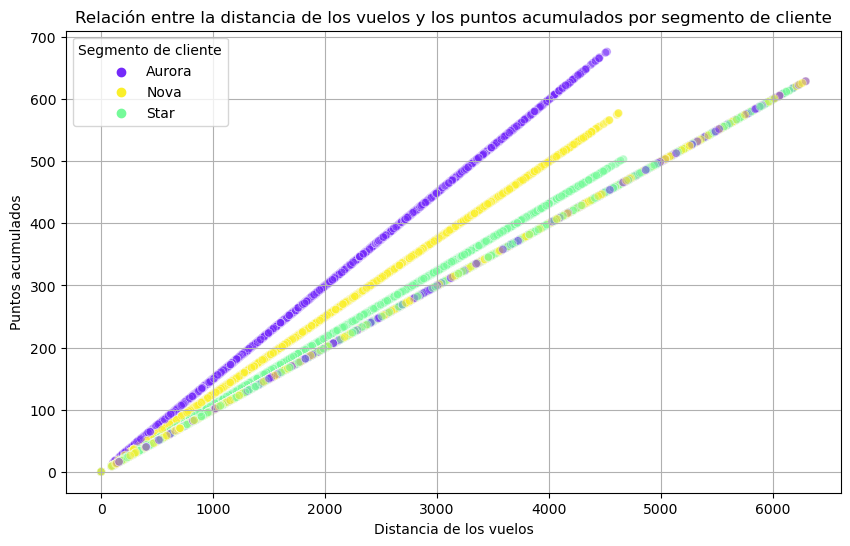

In [15]:
# Hacemos un scatterplot con hue = loyalty_card
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='points_accumulated', hue='loyalty_card', data=df_combined, alpha=0.5, palette=['#742AFA', '#FAEF2A', '#75FA99'])
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados por segmento de cliente')
plt.xlabel('Distancia de los vuelos')
plt.ylabel('Puntos acumulados')
plt.legend(title='Segmento de cliente')
plt.grid(True)
plt.show()


* Con este gráfico tenemos nuestra respuesta, cada línea representa un segmento de cliente. Esto sugiere que cada tipo de tarjeta tiene un patrón distinto en la acumulación de puntos en función de la distancia de los vuelos.
* El segmento de cliente Aurora acumula puntos a una tasa superior en comparación con los demás segmentos de cliente. 
* Intersección de Segmentos: La línea con colores mezclados puede indicar una zona donde los segmentos de clientes con diferentes tarjetas tienen comportamientos similares o solapados. Esto puede suceder en rangos de distancia donde las diferencias en las tasas de acumulación de puntos entre las tarjetas no son significativas, o donde hay una transición entre los beneficios ofrecidos por diferentes tipos de tarjetas. Este fenómeno también puede reflejar la variabilidad dentro de los tipos de tarjetas. Algunos clientes con diferentes tarjetas podrían tener patrones de acumulación de puntos similares debido a factores adicionales no contemplados en el gráfico. Como el acúmulo de puntos es inferior a los demás, esto podría por ejemplo caracterizar la diferencia entre acumulo de puntos para vuelos internacionales o domésticos. 

3. ¿Cuál es la distribución de los clientes por provincia o estado?

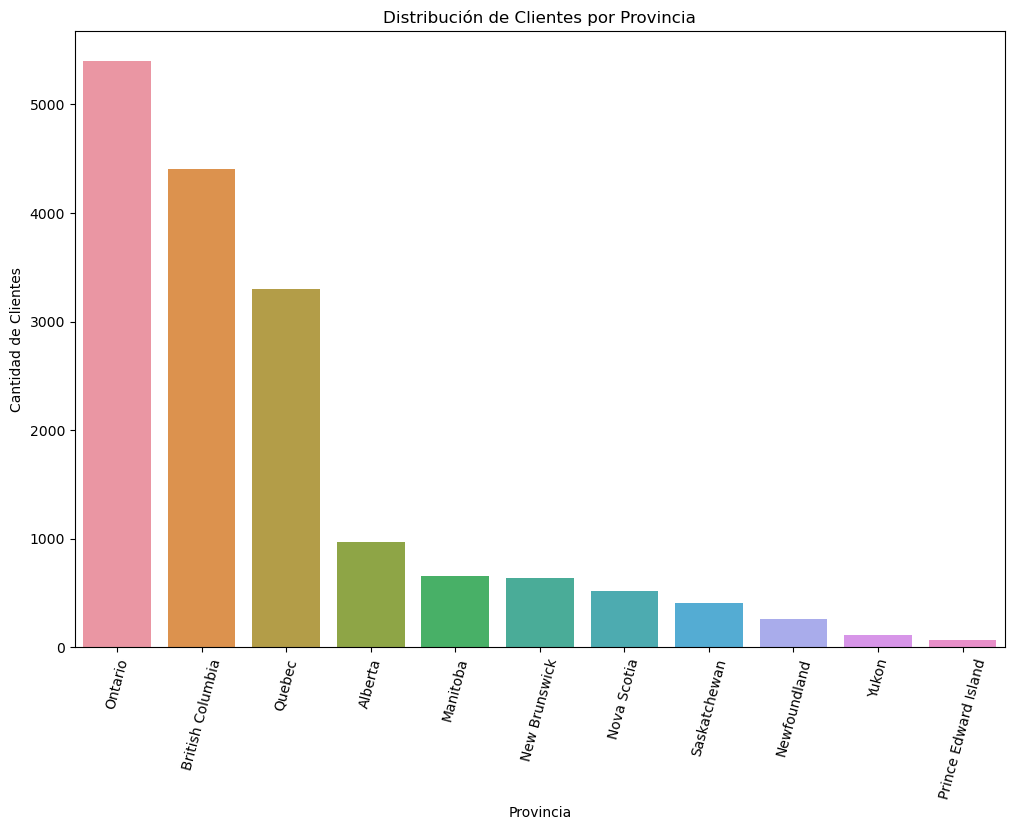

In [16]:
# Configuración de tamaño de la figura
plt.figure(figsize=(12, 8))

# Creamos un gráfico de barras
sns.countplot(data=df_history, x='province', order=df_history['province'].value_counts().index)

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=75)

# Añadir títulos y etiquetas
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Clientes')

# Mostrar el gráfico
plt.show()

Podemos ver en este gráfico que la mayoría de los clientes son de Ontario, British Columbia y Quebec.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

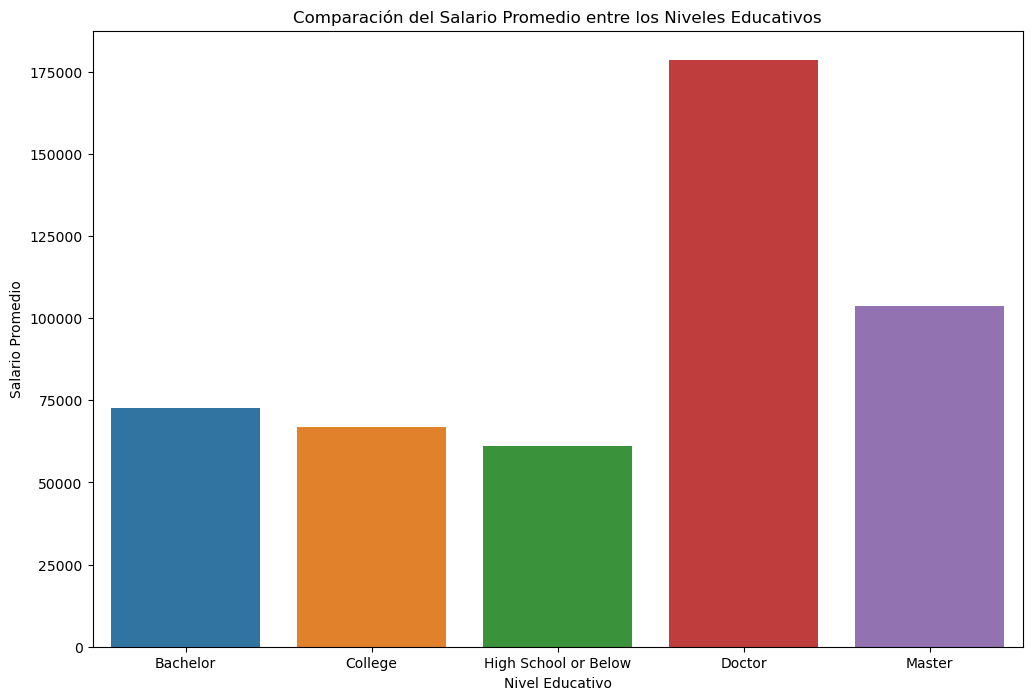

In [25]:
# Configuración de tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras
sns.barplot(data=df_history, x='education', y='salary', estimator=np.mean, ci=None, order=df_history['education'].value_counts().index)

# Añadir títulos y etiquetas
plt.title('Comparación del Salario Promedio entre los Niveles Educativos')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')

# Mostrar el gráfico
plt.show()


* Podemos concluir de este gráfico que los clientes con niveles educativos Doctor y Master tienen un salario promedio superior a los demás.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

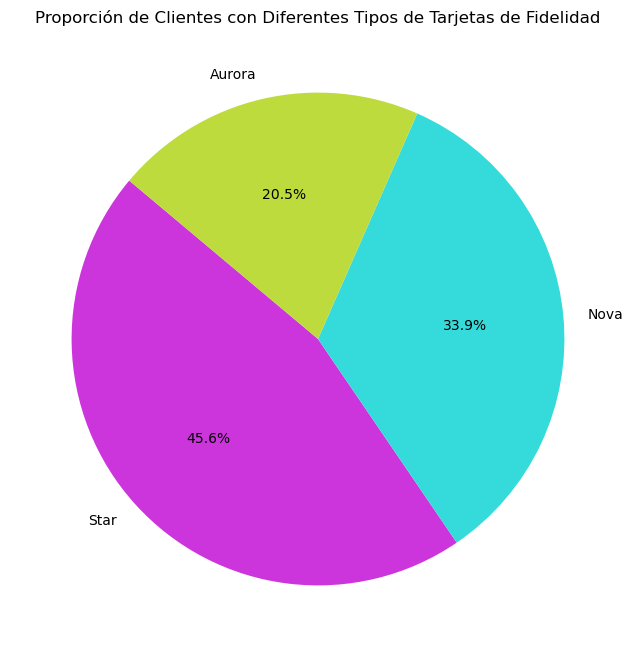

In [18]:
# Contamos el número de clientes para cada tipo de tarjeta de fidelidad
loyalty_card_counts = df_history['loyalty_card'].value_counts()

# Configuración del tamaño de la figura
plt.figure(figsize=(8, 8))

# Creamos el gráfico pieplot
plt.pie(loyalty_card_counts, labels=loyalty_card_counts.index, autopct='%1.1f%%', startangle=140, colors=['#CB35DB', '#35DBDB', '#BEDB3D'])

# Añadir un título
plt.title('Proporción de Clientes con Diferentes Tipos de Tarjetas de Fidelidad')

# Mostrar el gráfico
plt.show()


Podemos ver en este pieplot que casi el 50% de los clientes tiene el tipo de tarjeta de fidelidad Star.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

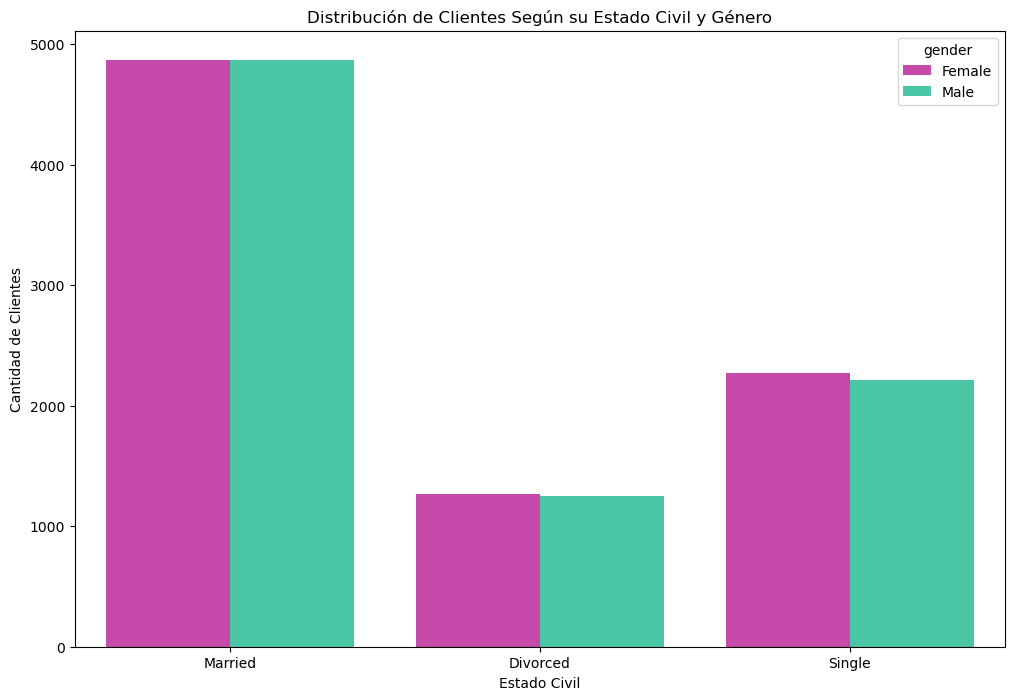

In [19]:
# Configuración del tamaño de la figura
plt.figure(figsize=(12, 8))

# Creamos el gráfico countplot
sns.countplot(data=df_history, x='marital_status', hue='gender', palette=['#DB35B6', '#35DBAF'])

# Añadir títulos y etiquetas
plt.title('Distribución de Clientes Según su Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')

# Mostrar el gráfico
plt.show()


* En este gráfico podemos ver que la mayor parte de los clientes tiene el estado civil Married y que casi no hay diferencia en la cantidad de clientes según el género. 
* Podemos ver una ligera diferencia entre generos para el grupo de clientes con estado civil Soltero, siendo que hay mas clientes mujeres que hombres en este grupo.